# Task 4

Machine Learning and Statistics

 Winter 2023/2024

by Brid Kennedy

***


 
 ## Using the famous iris data set <sup>1</sup> suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer ##

 


In [1]:
# Data frames.
import pandas as pd

# Machine Learning.
import sklearn as sk

#for kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#for plots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



The Iris dataset is a well-known dataset in machine learning and statistics and consists of four features (sepal length, sepal width, petal length, and petal width) and three classes of iris plants: setosa, versicolor, and virginica.
Below are images of the three Iris classes for which data has beeen collected. Within the three classes of Iris there are 50 measurements for each of the variables, namely sepal length, sepal width, petal length and petal width. Sepals and Petals are labelled in the image below

![Iris classes pic](https://miro.medium.com/max/1400/1*nfK3vGZkTa4GrO7yWpcS-Q.png)



In [2]:
#Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


 Try some descriptive statistics to get an overview of the data for each class

In [3]:
# Display descriptive statistics
print(iris_df.groupby('class').describe())

                sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
         

In [4]:
iris_df.isna()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
missing_values = iris_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [6]:
# Check for missing data
missing_data = iris_df.isnull().sum()
print("Missing Data:\n", missing_data)



Missing Data:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [7]:
# Drop rows with missing values
iris_df = iris_df.dropna()

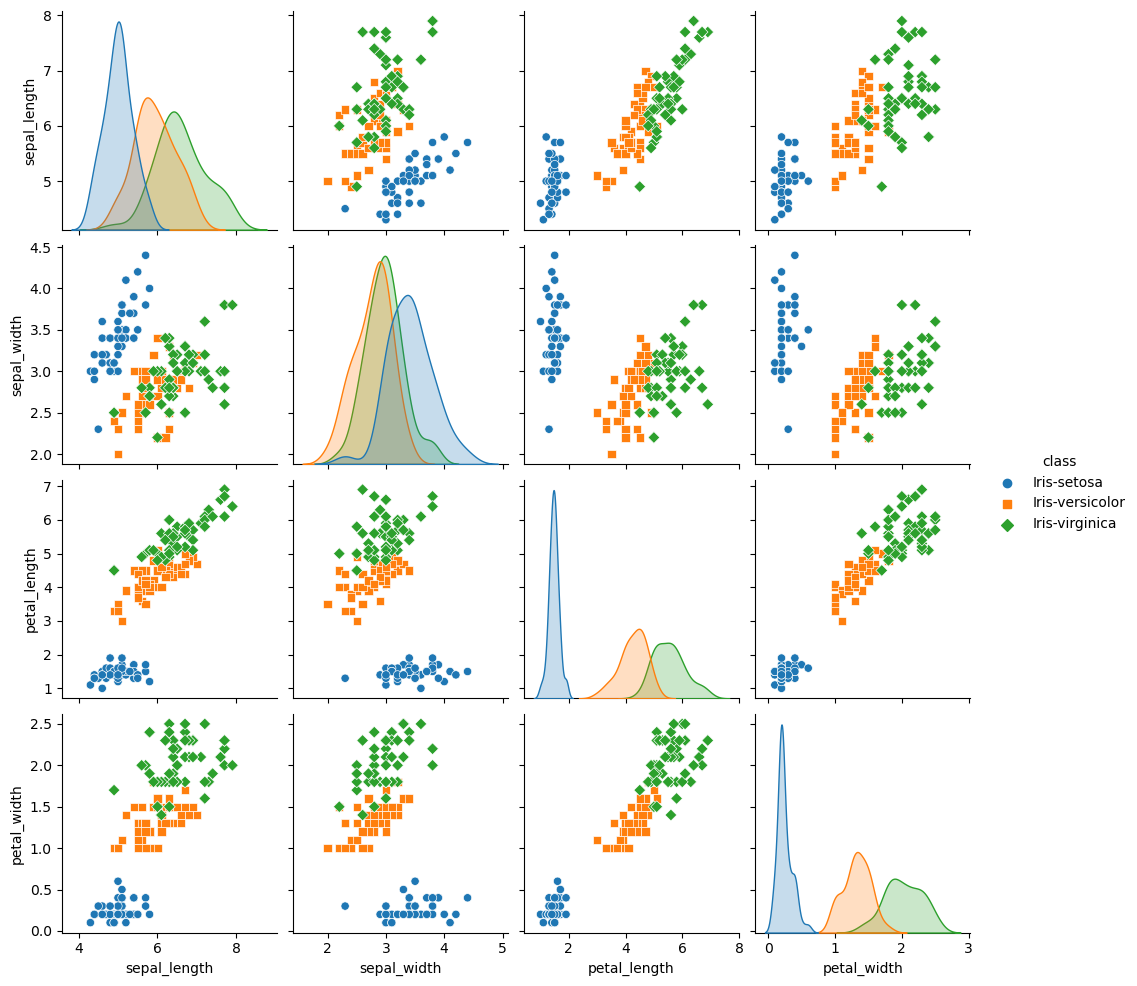

In [8]:
# Create a pair plot to see how the seperation between the classes looks
sns.pairplot(iris_df, hue="class", markers=["o", "s", "D"])
plt.show()

# For K nearest neighbour analysis
Set the features which are the variables used to make predictions, and the target variable is what we are trying to predict.
In this code snippet, X represents the features (sepal length, sepal width, petal length, petal width), and y represents the target variable (class of iris).

## Mapping Classes to Integers:

The k-NN algorithm works with numerical values. A map is created to convert the class names ("Iris-setosa", "Iris-versicolor", "Iris-virginica") to integers (0, 1, 2) so that the algorithm can use them for training and prediction.

## Splitting the Dataset:

The dataset is typically split into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance. This is done using the train_test_split function from scikit-learn.



In [9]:
#Encode Categorical Variable
iris_df['class'] = iris_df['class'].astype('category').cat.codes

# Feature Scaling:
Since k-NN is a distance-based algorithm, it can be a good idea to scale the features. This step is not always necessary, but it can help improve the performance of k-NN.

In [10]:
# Map the classes to integers for k-NN algorithm
class_mapping = {label: idx for idx, label in enumerate(iris_df['class'].unique())}
iris_df['class'] = iris_df['class'].map(class_mapping)

# Convert class labels to strings
class_mapping_str = {idx: str(label) for label, idx in class_mapping.items()}
target_names = [class_mapping_str[i] for i in range(len(class_mapping_str))]

# Display the first few rows of the dataset after mapping
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [11]:
# Separate features and target variable after mapping
X = iris_df.drop("class", axis=1)
y = iris_df["class"]

# Check for missing values in y
print("NaN values in y:", y.isnull().sum())

NaN values in y: 0


In [12]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Predict the classes on the test set
y_pred = knn_classifier.predict(X_test)



In [14]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


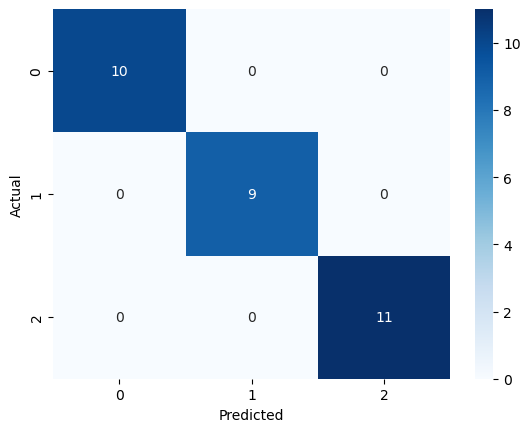

In [15]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [16]:
# Classification Report
class_report = classification_report(y_test.astype(str), y_pred.astype(str), target_names=target_names)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



I got high values for precision, recall, and F1-score, along with an accuracy of 1.00, indicating that the k-NN classifier is performing very well on the test set.

Precision: The proportion of true positive predictions among all positive predictions. A value of 1.00 means that there were no false positives.b
Recall: The proportion of true positive predictions among all actual positive instances. A value of 1.00 means that there were no false negatives.
F1-score: The harmonic mean of precision and recall. It provides a balanced measure between precision and recall.
Support: The number of actual occurrences of each class in the specified order.
The macro and weighted averages are computed across all classes, and in this case, they are also 1.00, indicating excellent overall performance indicating that all three classes can be separated from one another

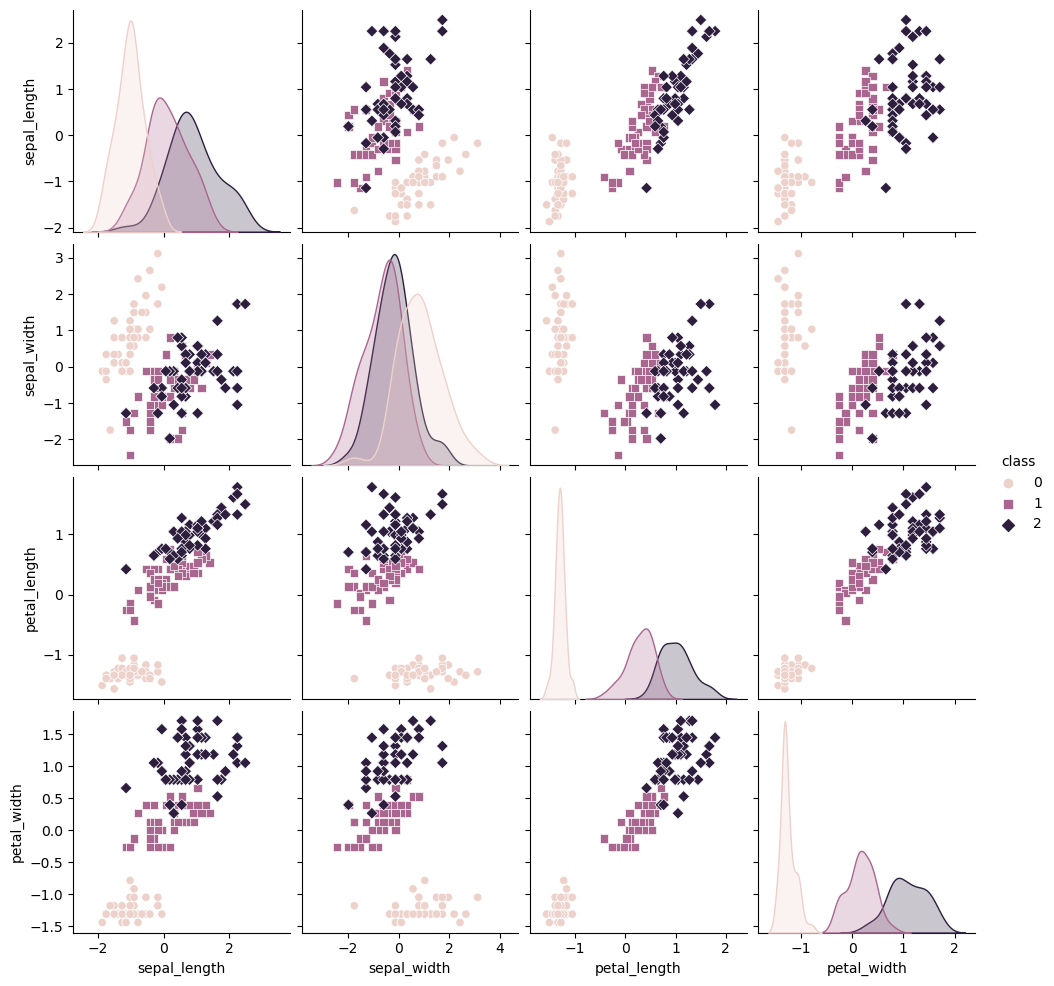

In [17]:
sns.pairplot(iris_df, hue="class", markers=["o", "s", "D"])

C:\Users\bridc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


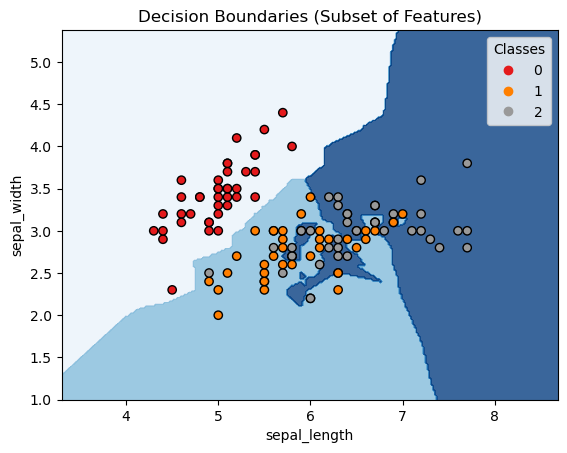

In [18]:
# Extract the first two features for visualization
X_subset = X_train.iloc[:, :2]

# Train the classifier on the reduced feature set
knn_classifier_subset = KNeighborsClassifier(n_neighbors=3)
knn_classifier_subset.fit(X_subset, y_train)

# Define a function to plot decision boundaries with legend
def plot_decision_boundary(X, y, model, title, class_labels, feature_names):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)

    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', label=class_labels)
    
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Get feature names from X_train
feature_names_subset = X_train.columns[:2].tolist()

# Plot decision boundaries with legend using the first two features
class_labels = [f"Class {label}" for label in y_train.unique()]
plot_decision_boundary(X_subset, y_train, knn_classifier_subset, "Decision Boundaries (Subset of Features)", class_labels, feature_names_subset)




Using the first two features of the iris in the descison boundary plot visually demonstates that setosa in red is easily separable from the other two classes. Separating Virginica and versicolour is a more difficault task using K nearest neighbour if relying on two features as there is large areas of overlap in the sepal measurements

## References
https://archive.ics.uci.edu/dataset/53/iris

https://scikit-learn.org/stable/index.html

https://matplotlib.org/stable/users/index.html

https://seaborn.pydata.org/documentation.html